In [84]:
import numpy as np
import pandas as pd

matches_df = pd.read_csv("./processed_data/matches.csv")
rikishi_df = pd.read_csv("./processed_data/rikishi.csv")

df = matches_df.merge(
    rikishi_df, left_on="westId", right_on="id"
).merge(
    rikishi_df, left_on="eastId", right_on="id", suffixes=["_west", "_east"]
).drop(
    columns=["id_east", "id_west"]
)

df = df.replace("0001-01-01T00:00:00Z", np.nan)

df["birthDate_east"] = pd.to_datetime(df["birthDate_east"], format="%Y-%m-%dT%H:%M:%SZ")
df["birthDate_west"] = pd.to_datetime(df["birthDate_west"], format="%Y-%m-%dT%H:%M:%SZ")

df
# df[df['birthDate_east'].isna()][["birthDate_east", "bashoId"]]
# df[df['birthDate_west'].isna()][["birthDate_west", "bashoId"]]

,bashoId,division,day,matchNo,eastId,eastRank,westId,westRank,kimarite,winnerId,...,height_west,weight_west,currentRank_west,heya_east,birthDate_east,shusshin_east,debut_east,height_east,weight_east,currentRank_east
0,200003,Makuuchi,9,1,3845,Juryo 1 West,3856,Maegashira 13 West,kotenage,3856,...,177.0,124.0,NaN,Sadogatake,1976-04-11,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
1,200003,Makuuchi,9,2,3745,Maegashira 11 East,3834,Juryo 1 East,tsukiotoshi,3834,...,175.0,150.5,NaN,Isenoumi,1972-06-16,"Kyoto-fu, Kyoto-shi, Nishikyo-ku",199503,177.0,128.5,NaN
2,200003,Makuuchi,9,3,3743,Maegashira 9 East,3838,Maegashira 12 West,yorikiri,3838,...,188.0,144.0,NaN,Mihogaseki,1970-03-21,"Kumamoto-ken, Uto-shi",199201,178.0,126.0,NaN
3,200003,Makuuchi,9,4,3747,Maegashira 8 East,3836,Maegashira 14 East,oshidashi,3836,...,181.0,139.0,NaN,Takasago,1969-12-11,"Aichi-ken, Ichinomiya-shi",199203,176.0,142.3,NaN
4,200003,Makuuchi,9,5,3860,Maegashira 7 East,794,Maegashira 12 East,oshitaoshi,794,...,185.0,116.0,NaN,Tokitsukaze,1973-11-08,"Nagasaki-ken, Fukue-shi",199603,184.0,134.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718836,200711,Makuuchi,7,16,3181,Maegashira 3 East,3858,Ozeki 1 West,tsukidashi,3858,...,181.5,158.0,NaN,Michinoku,1985-08-10,"Mongolia, Ulan-Bator - Mongolia, Sükhbaatar",200111,186.0,150.0,NaN
718837,200711,Makuuchi,7,17,3845,Ozeki 1 East,3835,Maegashira 4 West,yorikiri,3845,...,190.5,144.5,NaN,Sadogatake,1976-04-11,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
718838,200711,Makuuchi,7,18,3398,Sekiwake 1 West,4071,Ozeki 2 West,yorikiri,4071,...,185.0,175.0,NaN,Takasago,1981-08-07,"Mongolia, Ulan-Bator",200001,184.5,136.0,NaN
718839,200711,Makuuchi,7,19,4226,Ozeki 2 East,3247,Sekiwake 1 East,fusen,3247,...,185.0,136.0,NaN,Sadogatake,1983-02-19,"Bulgaria, Veliko Tarnovo",200211,202.0,140.0,NaN


In [85]:
basho_date = df["bashoId"].astype("str").str[:4] + "-" + df["bashoId"].astype("str").str[4:] + "-" + df["day"].astype("str")
basho_date = pd.to_datetime(basho_date, format="%Y-%m-%d")
df.insert(loc=1, value=basho_date, column="basho_date")
df

,bashoId,basho_date,division,day,matchNo,eastId,eastRank,westId,westRank,kimarite,...,height_west,weight_west,currentRank_west,heya_east,birthDate_east,shusshin_east,debut_east,height_east,weight_east,currentRank_east
0,200003,2000-03-09,Makuuchi,9,1,3845,Juryo 1 West,3856,Maegashira 13 West,kotenage,...,177.0,124.0,NaN,Sadogatake,1976-04-11,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
1,200003,2000-03-09,Makuuchi,9,2,3745,Maegashira 11 East,3834,Juryo 1 East,tsukiotoshi,...,175.0,150.5,NaN,Isenoumi,1972-06-16,"Kyoto-fu, Kyoto-shi, Nishikyo-ku",199503,177.0,128.5,NaN
2,200003,2000-03-09,Makuuchi,9,3,3743,Maegashira 9 East,3838,Maegashira 12 West,yorikiri,...,188.0,144.0,NaN,Mihogaseki,1970-03-21,"Kumamoto-ken, Uto-shi",199201,178.0,126.0,NaN
3,200003,2000-03-09,Makuuchi,9,4,3747,Maegashira 8 East,3836,Maegashira 14 East,oshidashi,...,181.0,139.0,NaN,Takasago,1969-12-11,"Aichi-ken, Ichinomiya-shi",199203,176.0,142.3,NaN
4,200003,2000-03-09,Makuuchi,9,5,3860,Maegashira 7 East,794,Maegashira 12 East,oshitaoshi,...,185.0,116.0,NaN,Tokitsukaze,1973-11-08,"Nagasaki-ken, Fukue-shi",199603,184.0,134.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718836,200711,2007-11-07,Makuuchi,7,16,3181,Maegashira 3 East,3858,Ozeki 1 West,tsukidashi,...,181.5,158.0,NaN,Michinoku,1985-08-10,"Mongolia, Ulan-Bator - Mongolia, Sükhbaatar",200111,186.0,150.0,NaN
718837,200711,2007-11-07,Makuuchi,7,17,3845,Ozeki 1 East,3835,Maegashira 4 West,yorikiri,...,190.5,144.5,NaN,Sadogatake,1976-04-11,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
718838,200711,2007-11-07,Makuuchi,7,18,3398,Sekiwake 1 West,4071,Ozeki 2 West,yorikiri,...,185.0,175.0,NaN,Takasago,1981-08-07,"Mongolia, Ulan-Bator",200001,184.5,136.0,NaN
718839,200711,2007-11-07,Makuuchi,7,19,4226,Ozeki 2 East,3247,Sekiwake 1 East,fusen,...,185.0,136.0,NaN,Sadogatake,1983-02-19,"Bulgaria, Veliko Tarnovo",200211,202.0,140.0,NaN


In [86]:
age_east = round((df["basho_date"] - df["birthDate_east"]) / pd.Timedelta(days=365.25), 1)
age_west = round((df["basho_date"] - df["birthDate_west"]) / pd.Timedelta(days=365.25), 1)

df.insert(loc=20, value=age_east, column="age_east")
df.insert(loc=13, value=age_west, column="age_west")

df

,bashoId,basho_date,division,day,matchNo,eastId,eastRank,westId,westRank,kimarite,...,weight_west,currentRank_west,heya_east,birthDate_east,age_east,shusshin_east,debut_east,height_east,weight_east,currentRank_east
0,200003,2000-03-09,Makuuchi,9,1,3845,Juryo 1 West,3856,Maegashira 13 West,kotenage,...,124.0,NaN,Sadogatake,1976-04-11,23.9,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
1,200003,2000-03-09,Makuuchi,9,2,3745,Maegashira 11 East,3834,Juryo 1 East,tsukiotoshi,...,150.5,NaN,Isenoumi,1972-06-16,27.7,"Kyoto-fu, Kyoto-shi, Nishikyo-ku",199503,177.0,128.5,NaN
2,200003,2000-03-09,Makuuchi,9,3,3743,Maegashira 9 East,3838,Maegashira 12 West,yorikiri,...,144.0,NaN,Mihogaseki,1970-03-21,30.0,"Kumamoto-ken, Uto-shi",199201,178.0,126.0,NaN
3,200003,2000-03-09,Makuuchi,9,4,3747,Maegashira 8 East,3836,Maegashira 14 East,oshidashi,...,139.0,NaN,Takasago,1969-12-11,30.2,"Aichi-ken, Ichinomiya-shi",199203,176.0,142.3,NaN
4,200003,2000-03-09,Makuuchi,9,5,3860,Maegashira 7 East,794,Maegashira 12 East,oshitaoshi,...,116.0,NaN,Tokitsukaze,1973-11-08,26.3,"Nagasaki-ken, Fukue-shi",199603,184.0,134.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718836,200711,2007-11-07,Makuuchi,7,16,3181,Maegashira 3 East,3858,Ozeki 1 West,tsukidashi,...,158.0,NaN,Michinoku,1985-08-10,22.2,"Mongolia, Ulan-Bator - Mongolia, Sükhbaatar",200111,186.0,150.0,NaN
718837,200711,2007-11-07,Makuuchi,7,17,3845,Ozeki 1 East,3835,Maegashira 4 West,yorikiri,...,144.5,NaN,Sadogatake,1976-04-11,31.6,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
718838,200711,2007-11-07,Makuuchi,7,18,3398,Sekiwake 1 West,4071,Ozeki 2 West,yorikiri,...,175.0,NaN,Takasago,1981-08-07,26.3,"Mongolia, Ulan-Bator",200001,184.5,136.0,NaN
718839,200711,2007-11-07,Makuuchi,7,19,4226,Ozeki 2 East,3247,Sekiwake 1 East,fusen,...,136.0,NaN,Sadogatake,1983-02-19,24.7,"Bulgaria, Veliko Tarnovo",200211,202.0,140.0,NaN


In [107]:
from matplotlib import pyplot as plt

# plt.hist(pd.concat([df["age_east"], df["age_west"]]), bins=500)

dtype('float64')

Index([195803, 195805, 195807, 195809, 195811, 195901, 195903, 195905, 195907,
       195909,
       ...
       202211, 202301, 202303, 202305, 202307, 202309, 202311, 202401, 202403,
       202405],
      dtype='int64', name='bashoId', length=396)


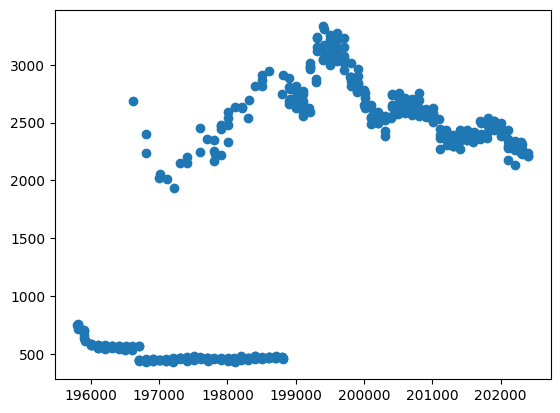

In [177]:
# any(df.groupby("bashoId").size().fillna(0).isna())
print(df.groupby("bashoId").size().index.unique())
# grouped = df.groupby("bashoId").size()
plt.scatter(grouped.index, grouped.values)